# From Biological to Artificial Neurons

## The Perceptron

* The perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU).

* Scikit-Learn provides a Perceptron class that can be used pretty much as you would expect—for example, on the iris dataset

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # predicts True and False for these 2 flowers

In [2]:
y_pred

array([ True, False])

## Regression MLPs

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
housing = fetch_california_housing()

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data,
    housing.target,
    random_state=42
)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full,
    y_train_full,
    random_state=42
)

In [7]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],
    random_state=42
)

In [8]:
pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)

In [9]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

In [10]:
rmse = root_mean_squared_error(y_valid, y_pred)

In [11]:
rmse

0.5053326657967967

## Classification MLPs

In [12]:
from sklearn.datasets import load_iris
A = load_iris()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(A.data, A.target, random_state=42)

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

mlp_clf = MLPClassifier(
    hidden_layer_sizes=[5,8],
    max_iter=500,
    random_state=42,
    verbose = True,
    alpha=0.01,
    early_stopping=True
)

pipeline = make_pipeline(
    StandardScaler(),
    mlp_clf
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

Iteration 1, loss = 0.90357396
Validation score: 0.333333
Iteration 2, loss = 0.90026353
Validation score: 0.333333
Iteration 3, loss = 0.89697773
Validation score: 0.333333
Iteration 4, loss = 0.89371710
Validation score: 0.333333
Iteration 5, loss = 0.89049354
Validation score: 0.333333
Iteration 6, loss = 0.88729736
Validation score: 0.333333
Iteration 7, loss = 0.88412733
Validation score: 0.333333
Iteration 8, loss = 0.88098044
Validation score: 0.333333
Iteration 9, loss = 0.87786561
Validation score: 0.333333
Iteration 10, loss = 0.87478224
Validation score: 0.333333
Iteration 11, loss = 0.87170958
Validation score: 0.333333
Iteration 12, loss = 0.86867681
Validation score: 0.333333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [15]:
acc

0.5

In [16]:
cm

array([[15,  0,  0],
       [ 7,  4,  0],
       [ 2, 10,  0]], dtype=int64)

# Implementing MLPs with Keras

## Building an Image Classifier Using the Sequential API

In [17]:
from tensorflow import keras
print(keras.__version__)

3.7.0


### Using Keras to load the dataset

In [18]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [19]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

* Let's look data shapes & types

In [20]:
X_train.shape

(55000, 28, 28)

In [21]:
X_train.dtype

dtype('uint8')

* For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats)

In [22]:
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0

In [23]:
print(X_valid.shape)


(5000, 28, 28)


* With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

* For example, the first image in the training set represents an ankle boot:

In [25]:
class_names[y_train[0]]

'Ankle boot'

### Creating the model using the sequential API

* Now let’s build the neural network! Here is a classification MLP with two hidden layers

In [26]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu")) #Hidden 1
model.add(tf.keras.layers.Dense(100, activation="relu")) #Hidden 2
model.add(tf.keras.layers.Dense(10, activation="softmax"))

* Instead of adding the layers one by one as we just did, it’s often more convenient to pass a list of layers when creating the Sequential model. You can also drop the Input layer and instead specify the input_shape in the first layer:

In [27]:
##model = tf.keras.Sequential(
#    [
#        tf.keras.layers.Input(shape=[28, 28]),
#        tf.keras.layers.Dense(300, activation="relu"), #Hidden 1
#        tf.keras.layers.Dense(100, activation="relu"), #Hidden 2
#        tf.keras.layers.Dense(10, activation="softmax")
#    ]
#)

* The model’s summary() method displays all the model’s layers,⁠ including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters..

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

* Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

* You can easily get a model’s list of layers using the layers attribute, or use the get_layer() method to access a layer by name:

In [29]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [30]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [31]:
model.get_layer('dense') is hidden1

True

In [32]:
weights, biases = hidden1.get_weights()

In [33]:
weights

array([[ 0.06232093, -0.04144753, -0.00236116, ..., -0.04831953,
         0.02645532,  0.07326569],
       [-0.06841248, -0.01136567,  0.01530197, ...,  0.01934133,
         0.04474924,  0.03255861],
       [-0.02426652, -0.04916633, -0.01255452, ...,  0.04554836,
         0.00215453, -0.01322366],
       ...,
       [ 0.06776233,  0.02078284,  0.06946106, ...,  0.05736829,
         0.023509  , -0.04902883],
       [-0.06855067, -0.02840155,  0.02313461, ..., -0.00069304,
        -0.00617536,  0.02848803],
       [ 0.04792387,  0.05444257, -0.03690857, ..., -0.02482099,
        -0.03238373,  0.00320915]], dtype=float32)

In [34]:
weights.shape

(784, 300)

In [35]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
biases.shape

(300,)

## Compiling the model

In [37]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics=["accuracy"]
)

### Training and evaluating the model

In [38]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.6842 - loss: 0.9984 - val_accuracy: 0.8268 - val_loss: 0.5088
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8272 - loss: 0.5074 - val_accuracy: 0.8414 - val_loss: 0.4593
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8436 - loss: 0.4537 - val_accuracy: 0.8454 - val_loss: 0.4366
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8534 - loss: 0.4240 - val_accuracy: 0.8510 - val_loss: 0.4220
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8598 - loss: 0.4025 - val_accuracy: 0.8512 - val_loss: 0.4109
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8652 - loss: 0.3852 - val_accuracy: 0.8564 - val_loss: 0.4014
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8700 - loss: 0.3708 - val_accuracy: 0.8594 - val_loss: 0.3931
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8732 - loss: 0

* The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a Pandas DataFrame and call its plot() method, you get the learning curves

<Axes: xlabel='Epoch'>

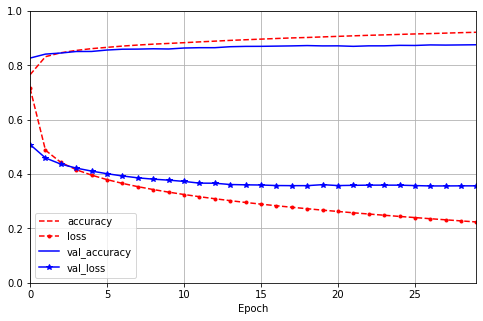

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 29],
    ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)

In [40]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8741 - loss: 0.3699


[0.36752766370773315, 0.8737000226974487]

## Train the Model to Make Predictions

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.01, 0.  , 0.71],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

* If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the argmax() method to get the highest probability class index for each instance:

In [42]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Building a Regression MLP Using the Sequential API

* Let’s switch back to the California housing problem and tackle it using the same MLP as earlier, with 3 hidden layers composed of 50 neurons each, but this time building it with Keras. Using the sequential API to build, train, evaluate, and use a regression MLP is quite similar to what we did for classification. The main differences in the following code example are the fact that the output layer has a single neuron (since we only want to predict a single value) and it uses no activation function, the loss function is the mean squared error, the metric is the RMSE, and we’re using an Adam optimizer like Scikit-Learn’s MLPRegressor did.

In [44]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [45]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

mse_test, rmse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

c:\Users\MRE\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - RootMeanSquaredError: 1.1780 - loss: 1.4867 - val_RootMeanSquaredError: 0.6220 - val_loss: 0.3869
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6337 - loss: 0.4020 - val_RootMeanSquaredError: 0.7184 - val_loss: 0.5162
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 0.6061 - loss: 0.3676 - val_RootMeanSquaredError: 0.5789 - val_loss: 0.3351
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5937 - loss: 0.3526 - val_RootMeanSquaredError: 1.0471 - val_loss: 1.0965
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5853 - loss: 0.3428 - val_RootMeanSquaredError: 1.0718 - val_loss: 1.1488
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5763 - loss: 0.3323 - val_RootMeanSquaredError: 0.6168 - val_loss: 0.3805
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5672 - los

## Building Complex Models Using the Functional API

* It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

* Let’s build such a neural network to tackle the California housing problem:

In [46]:
normalization_layer = tf.keras.layers.Normalization()

hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)

hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)

concat = concat_layer([normalized, hidden2])

output = output_layer(concat)

model = tf.keras.Model(
    inputs=[input_],
    outputs=[output]
)

* But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path ? In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7). We can do this as follows..

In [47]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

* Now we can compile the model as usual, but when we call the fit() method, instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_wide, X_train_deep), one per input. The same is true for X_valid, and also for X_test and X_new when you call evaluate() or predict():

In [48]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide,X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide,X_valid_deep),y_valid))

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - RootMeanSquaredError: 1.9095 - loss: 3.7603 - val_RootMeanSquaredError: 0.9673 - val_loss: 0.9357
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.8773 - loss: 0.7711 - val_RootMeanSquaredError: 0.8126 - val_loss: 0.6603
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.7553 - loss: 0.5708 - val_RootMeanSquaredError: 0.7501 - val_loss: 0.5626
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6982 - loss: 0.4877 - val_RootMeanSquaredError: 0.6514 - val_loss: 0.4244
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6606 - loss: 0.4366 - val_RootMeanSquaredError: 0.6495 - val_loss: 0.4218
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6352 - loss: 0.4036 - val_RootMeanSquaredError: 0.6076 - val_loss: 0.3691
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6188 - los

* Adding an auxiliary output for regularization:

In [49]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [50]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(
    inputs=[input_wide, input_deep], 
    outputs=[output, aux_output]
)

* Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses.

In [51]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(
    loss=("mse", "mse"),
    loss_weights=(0.9, 0.1),
    optimizer=optimizer,
    metrics=["RootMeanSquaredError", "RootMeanSquaredError"]
)

* Now when we train the model, we need to provide labels for each output.

In [52]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=20,
    validation_data=(
        (X_valid_wide, X_valid_deep),
        (y_valid, y_valid)
    )
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - dense_2_RootMeanSquaredError: 1.4526 - dense_2_loss: 2.1886 - dense_3_RootMeanSquaredError: 1.4956 - dense_3_loss: 2.2669 - loss: 2.1965 - val_dense_2_RootMeanSquaredError: 1.8381 - val_dense_2_loss: 3.3771 - val_dense_3_RootMeanSquaredError: 2.8507 - val_dense_3_loss: 8.1225 - val_loss: 3.8534
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - dense_2_RootMeanSquaredError: 0.7539 - dense_2_loss: 0.5693 - dense_3_RootMeanSquaredError: 0.9233 - dense_3_loss: 0.8533 - loss: 0.5977 - val_dense_2_RootMeanSquaredError: 1.1011 - val_dense_2_loss: 1.2120 - val_dense_3_RootMeanSquaredError: 2.0310 - val_dense_3_loss: 4.1230 - val_loss: 1.5038
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - dense_2_RootMeanSquaredError: 0.6616 - dense_2_loss: 0.4378 - dense_3_RootMeanSquaredError: 0.7832 - dense_3_loss: 0.6136 - loss: 0.4554 - val_dense_2_RootMeanSquaredError: 0.7248 - val_dense_2_loss: 0.5252 - val_dense_3_RootMeanSquaredError: 1.4

In [53]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))

weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.5773 - dense_2_loss: 0.3334 - dense_3_RootMeanSquaredError: 0.6315 - dense_3_loss: 0.3989 - loss: 0.3400


In [54]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


* The predict() method returns a tuple, and it does not have a return_dict argument to get a dictionary instead. However, you can create one using model.output_names:

In [55]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


## Using the Subclassing API to Build Dynamic Models

In [56]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation="relu", name="my_cool_model")
       

## Saving and Restoring Models

In [57]:
# model.save("my_keras_model", save_format="tf")
# model=tf.keras.load_model("my_keras_model")
# y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

# Fine-Tuning Neural Network Hyperparameters

In [63]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
    sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
        model.add(tf.keras.layers.Dense(10, activation="softmax"))
        model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
        metrics=["accuracy"])
    return model

In [64]:
random_search_tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_fashion_mnist",
    project_name="my_rnd_search",
    seed=42
)

random_search_tuner.search(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 50s]
val_accuracy: 0.004392764996737242

Best val_accuracy So Far: 0.004392764996737242
Total elapsed time: 00h 05m 37s


* You can get the best models like this:

In [65]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

* You can also call get_best_hyperparameters() to get the kt.HyperParameters of the best models:

In [66]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values # best hyperparameter values

{'n_hidden': 5,
 'n_neurons': 25,
 'learning_rate': 0.0006562536901904111,
 'optimizer': 'sgd'}

* Since the oracle keeps track of all the trials, you can ask it to give you the best one, and you can display a summary of that trial:

In [67]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 0 summary
Hyperparameters:
n_hidden: 5
n_neurons: 25
learning_rate: 0.0006562536901904111
optimizer: sgd
Score: 0.004392764996737242


* This shows the best hyperparameters (like earlier), as well as the validation accuracy. You can also access all the metrics directly:

In [68]:
best_trial.metrics.get_last_value("val_accuracy")

0.004392764996737242

* If you are happy with the best model’s performance, you may continue training it for a few epochs on the full training set (X_train_full andy_train_full)

In [69]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.0027 - loss: 2.2319
Epoch 2/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0027 - loss: 2.1588
Epoch 3/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0027 - loss: 2.0960
Epoch 4/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.0027 - loss: 2.0390
Epoch 5/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.0027 - loss: 1.9891
Epoch 6/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.0027 - loss: 1.9436
Epoch 7/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0027 - loss: 1.9023
Epoch 8/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.0027 - loss: 1.8652
Epoch 9/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.0027 - loss: 1.8323
Epoch 10/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0027 - loss: 1.8033
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0016 - loss: 1.7979


* In some cases, you may want to fine-tune data preprocessing hyperparameters, or model.fit() arguments, such as the batch size. For this:

In [70]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)
    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

* You can then pass an instance of this class to the tuner of your choice, instead of passing the build_model function. For example, let’s build a kt.Hyperband tuner based on a ``MyClassificationHyperModel`` instance:

In [71]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(),
    objective="val_accuracy",
    seed=42,
    max_epochs=10,
    factor=3,
    hyperband_iterations=2,
    overwrite=True,
    directory="my_fashion_mnist",
    project_name="hyperband"
)

* Let’s run the Hyperband tuner now. We’ll use the TensorBoard callback, this time pointing to the root log directory (the tuner will take care of using a different subdirectory for each trial), as well as an EarlyStopping callback:

In [72]:
from pathlib import Path

root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb, tensorboard_cb]
)

Trial 50 Complete [00h 01m 41s]
val_accuracy: 0.004392764996737242

Best val_accuracy So Far: 0.004392764996737242
Total elapsed time: 00h 37m 44s


* how much you want the algorithm to explore, instead of simply exploiting the known good regions of hyperparameter space (it defaults to 2.6). Other than that, this tuner can be used just like the previous ones:

In [73]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(),
    objective="val_accuracy",
    seed=42,
    max_trials=10,
    alpha=1e-4,
    beta=2.6,
    overwrite=True,
    directory="my_fashion_mnist",
    project_name="bayesian_opt"
)

bayesian_opt_tuner.search(
    X_train,
    y_train,
    epochs=10,
   validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb]
)

Trial 10 Complete [00h 01m 16s]
val_accuracy: 0.004392764996737242

Best val_accuracy So Far: 0.004392764996737242
Total elapsed time: 00h 11m 55s


# Exercises

* Train a deep MLP on the MNIST dataset (you can load it using tf.keras. data⁠ sets.mnist.load_data()). See if you can get over 98% accuracy by manually tuning the hyperparameters. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Next, try tuning the hyperparameters using Keras Tuner with all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

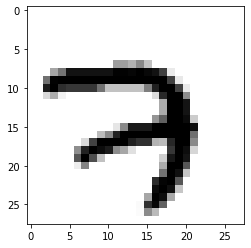

In [75]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")

* Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [76]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])

In [77]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

c:\Users\MRE\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


* We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [79]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

expon_lr = ExponentialLearningRate(factor=1.005)

* Now let's train the model for just 1 epoch:

In [82]:
history = model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_data=(X_valid, y_valid), callbacks=[expon_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.4865 - loss: nan - val_accuracy: 0.0958 - val_loss: nan


* We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

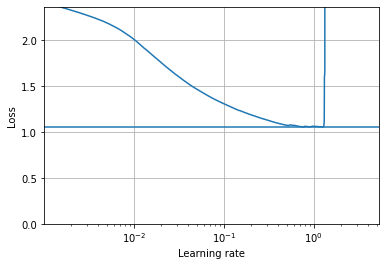

In [83]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

* The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [84]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [86]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [87]:
run_index = 1
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

WindowsPath('my_mnist_logs/run_001')

In [88]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model.keras", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb]
)

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8697 - loss: 0.4147 - val_accuracy: 0.9708 - val_loss: 0.1078
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9693 - loss: 0.1022 - val_accuracy: 0.9744 - val_loss: 0.0880
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.9810 - loss: 0.0610 - val_accuracy: 0.9768 - val_loss: 0.0850
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.9859 - loss: 0.0426 - val_accuracy: 0.9760 - val_loss: 0.0853
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9905 - loss: 0.0309 - val_accuracy: 0.9730 - val_loss: 0.1019
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9792 - val_loss: 0.0844
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 29ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9788 - val_loss: 0.0944
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 

In [89]:
model = tf.keras.models.load_model("my_mnist_model.keras") # rollback to best model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9741 - loss: 0.1000


[0.08024095743894577, 0.9787999987602234]

* We got over 98% accuracy. Finally....